In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np

In [21]:
import re
sentences = """We are about to study the idea of computational proces. Computational processes are abstract beings that inhabit computers. As they evolve. processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with out spells."""

In [22]:
sentences = re.sub('[^A-Za-z0-9]+',' ', sentences)
print(sentences)

We are about to study the idea of computational proces Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with out spells 


In [23]:
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ',sentences).strip()
print(sentences)

We are about to study the idea of computational proces Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with out spells


In [24]:
sentences = sentences.lower()

In [25]:
words = sentences.split()
print(words)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'proces', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'out', 'spells']


In [26]:
vocab = set(words)
print(vocab)

{'direct', 'inhabit', 'they', 'directed', 'by', 'as', 'pattern', 'data', 'program', 'we', 'about', 'create', 'that', 'proces', 'idea', 'with', 'programs', 'of', 'beings', 'to', 'evolve', 'computers', 'conjure', 'spells', 'in', 'out', 'study', 'computational', 'evolution', 'is', 'rules', 'processes', 'abstract', 'process', 'the', 'people', 'effect', 'called', 'spirits', 'manipulate', 'other', 'are', 'computer', 'things'}


In [27]:
# words = sentences.split()
# vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [28]:
word_to_ix = {word: i for  i, word in enumerate(vocab)}
print(word_to_ix)

{'direct': 0, 'inhabit': 1, 'they': 2, 'directed': 3, 'by': 4, 'as': 5, 'pattern': 6, 'data': 7, 'program': 8, 'we': 9, 'about': 10, 'create': 11, 'that': 12, 'proces': 13, 'idea': 14, 'with': 15, 'programs': 16, 'of': 17, 'beings': 18, 'to': 19, 'evolve': 20, 'computers': 21, 'conjure': 22, 'spells': 23, 'in': 24, 'out': 25, 'study': 26, 'computational': 27, 'evolution': 28, 'is': 29, 'rules': 30, 'processes': 31, 'abstract': 32, 'process': 33, 'the': 34, 'people': 35, 'effect': 36, 'called': 37, 'spirits': 38, 'manipulate': 39, 'other': 40, 'are': 41, 'computer': 42, 'things': 43}


In [29]:
ix_to_word = {i: word for i, word in enumerate(vocab)}
print(ix_to_word)

{0: 'direct', 1: 'inhabit', 2: 'they', 3: 'directed', 4: 'by', 5: 'as', 6: 'pattern', 7: 'data', 8: 'program', 9: 'we', 10: 'about', 11: 'create', 12: 'that', 13: 'proces', 14: 'idea', 15: 'with', 16: 'programs', 17: 'of', 18: 'beings', 19: 'to', 20: 'evolve', 21: 'computers', 22: 'conjure', 23: 'spells', 24: 'in', 25: 'out', 26: 'study', 27: 'computational', 28: 'evolution', 29: 'is', 30: 'rules', 31: 'processes', 32: 'abstract', 33: 'process', 34: 'the', 35: 'people', 36: 'effect', 37: 'called', 38: 'spirits', 39: 'manipulate', 40: 'other', 41: 'are', 42: 'computer', 43: 'things'}


In [30]:
data = []
for i in range(2, len(words)- 2):
    context = [words[i - 2],words[i - 1],words[i + 1],words[i + 2]]
    target = words[i]
    data.append((context,target))
print(data[:5])
print("length: ",len(data))

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]
length:  54


In [31]:
embeddings = np.random.random_sample((vocab_size,embed_dim))
# print(embeddings)

In [32]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [33]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x/e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return(- out + softmax) / logits.shape[0]

In [34]:
def forward(contect_idxs, theta):
    m = embeddings[contect_idxs].reshape(1,-1)
    n = linear(m,theta)
    o = log_softmax(n)
    return m, n, o

In [35]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

In [36]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Text(0, 0.5, 'Losses')

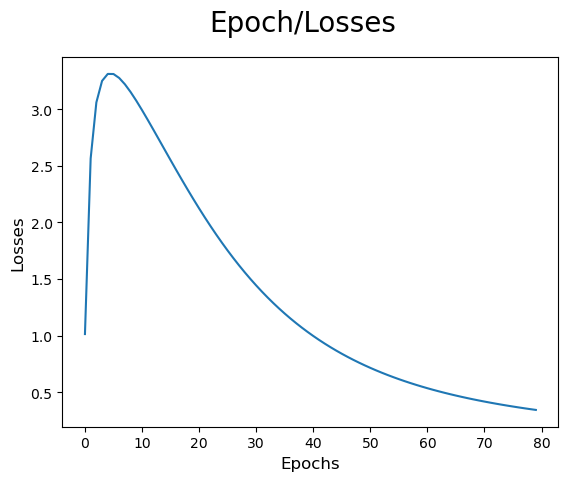

In [37]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = {}
for epoch in range(80):
    losses = []
    for context, target in data:
        contect_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(contect_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    epoch_losses[epoch] = losses
    ix = np.arange(0,80)
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix, [epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Losses',fontsize=12)
#Text(0, 0.5, 'Losses')

In [38]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word

In [39]:
def accuracy():
    wrong = 0
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
    return(1 - (wrong / len(data)))
accuracy()
predict(['processes','manipulate','things','study'])

'about'